## Python and Jupyter basics
This section provides basic background on Python and Jupyter

In [2]:
def square(x):
    """square the value"""
    return x * x

In [3]:
square(10)

100

## Lists

In [16]:
list1 = ['a', 'b', 'c', 'd']

list2 = []
for i in list1:
    list2.append(i + "_")
    
list2

['a_', 'b_', 'c_', 'd_']

### List comprehension

In [17]:
list2 = [i+"_" for i in list1]
list2

['a_', 'b_', 'c_', 'd_']

## Create a shakespeare txt file

In [46]:
import requests
import os

def download_file_from_url(url, file_name):
    """Downloads the file from url and dumps into the current working directory"""
    response = requests.get(url)
    print("status_code = {}".format(response.status_code))
    if response.status_code == 200:
        with open (file_name,"wb") as f:
            f.write(response.content)
    else:
        print("please check the url again! \n The response status code = {}".format(response.status_code))

def read_from_file(file_name):
    """Checks if the file exists in current working directory.
       if so reads the same and returns the contents in a list
       else prints appropriate message and returns None"""
    if (os.path.exists(file_name)):
        with open(file_name, "rt") as f:
            lines = f.readlines()
        print("number of lines in {}: {}".format(file_name, len(lines)))
        return lines
    else:
        print("Sorry.. please check the file name and path again: {}".format(file_name))
        return None

url = "https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt"
file_name = "shakespeare.txt"
download_file_from_url(url, file_name)
lines = read_from_file(file_name)

status_code = 200
number of lines in shakespeare.txt: 124456


In [50]:
print(lines[:10]) # sample first 10 lines
print()

# number of characters in the file
num_of_chars_in_file = sum([len(line) for line in lines])
print("number of characters in the file: {}".format(num_of_chars_in_file))

# find the number of words in the file using list comprehension
import datetime
time1 = datetime.datetime.now()
num_of_words_in_file = sum([len(line.split()) for line in lines])
time2 = datetime.datetime.now()
print("number of words in the file: {}".format(num_of_words_in_file))
elapsed_time = (time2-time1).microseconds
print("it took {} microseconds to compute it".format(elapsed_time))

# alternatively the number of words could be found using generators!
num_of_words_in_file = sum(len(line.split()) for line in lines)
print("number of words in the file: {}".format(num_of_words_in_file))

# better way to timeit
import timeit

['This is the 100th Etext file presented by Project Gutenberg, and\n', 'is presented in cooperation with World Library, Inc., from their\n', 'Library of the Future and Shakespeare CDROMS.  Project Gutenberg\n', 'often releases Etexts that are NOT placed in the Public Domain!!\n', '\n', 'Shakespeare\n', '\n', '*This Etext has certain copyright implications you should read!*\n', '\n', '<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM\n']

number of characters in the file: 5458199
number of words in the file: 901325
it took 165010 microseconds to compute it
number of words in the file: 901325
121 ms ± 3.65 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
123 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [51]:
%%timeit 
sum([len(line.split()) for line in lines])

118 ms ± 2.43 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [52]:
%%timeit 
sum(len(line.split()) for line in lines) # surprisingly the generators are taking longer!

119 ms ± 783 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### list insert is costlier than list append!

In [55]:
%%timeit
all_words = []
for line in lines[:10000]:
    for word in line.split():
        all_words.insert(0, word)

1.21 s ± 7.27 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [56]:
%%timeit
all_words = []
for line in lines[:10000]:
    for word in line.split():
        all_words.append(word)

16.4 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### dictionaries

In [57]:
dict1 = {"a": 1,"b":2, "c":3, "d":4}
dict1

{'a': 1, 'b': 2, 'c': 3, 'd': 4}

In [58]:
dict1['c'] = 30
dict1

{'a': 1, 'b': 2, 'c': 30, 'd': 4}

In [61]:
# dictionary comprehension
{i:i**2 for i in range(10)}

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}

## Classes

In [62]:
class MyClass:
    def __init__(self, n):
        self.n = n
    
    def get_n(self):
        return self.n

In [63]:
a = MyClass(1)
a.get_n()

1

## Visualizations

In [66]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
# %matplotlib inline

<IPython.core.display.Javascript object>


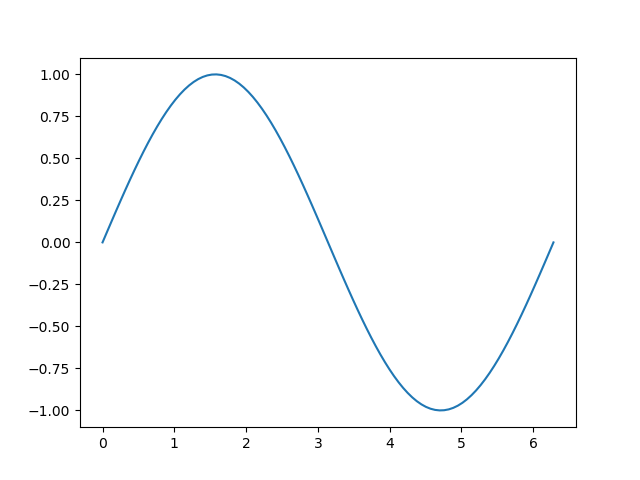

In [68]:
x = np.linspace(0, 2*np.pi, 100)
plt.plot(x, np.sin(x))